<a href="https://colab.research.google.com/github/Antoniopv7/Mineria-Prueba2/blob/main/Evaluacion_2_Mineria_de_datos_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Importar librerías
import pandas as pd
import urllib.request
import zipfile
import tempfile
import numpy
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [9]:
# 1. Descargar la encuesta CASEN 2022
STATA_zip_url = 'https://observatorio.ministeriodesarrollosocial.gob.cl/storage/docs/casen/2022/Base%20de%20datos%20Casen%202022%20STATA_18%20marzo%202024.dta.zip'
STATA_file_name = 'Base de datos Casen 2022 STATA_18 marzo 2024.dta'

STATA_temp_file = tempfile.NamedTemporaryFile(delete=False)
STATA_zip_name = STATA_temp_file.name
urllib.request.urlretrieve(STATA_zip_url, STATA_zip_name)
with zipfile.ZipFile(STATA_zip_name, 'r') as zip_ref:
    zip_ref.extract(STATA_file_name)

data_STATA = pd.read_stata(STATA_file_name, convert_categoricals=False)

<ipython-input-9-46b2724262f0>:11: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  data_STATA = pd.read_stata(STATA_file_name, convert_categoricals=False)


In [10]:
# 2. Formar el dataset, normalizando los valores entre 0 a 1
scaler = MinMaxScaler()
data_STATA_cleaned_normalized = pd.DataFrame(scaler.fit_transform(data_STATA_cleaned), columns=data_STATA_cleaned.columns)

# 3. Aplique transformaciones de los datos para ajustar mejor el modelo de regresión lineal múltiple
# (Aquí puedes explorar diferentes transformaciones como logaritmo, raíz cuadrada, etc.)

In [11]:
# 5. Realice una limpieza de los datos, eliminando valores nulos y outliers
data_STATA_cleaned = data_STATA.dropna(subset=['ytrabajocor'])
data_STATA_cleaned = data_STATA_cleaned.apply(pd.to_numeric, errors='coerce')
data_STATA_cleaned = data_STATA_cleaned.dropna(thresh=0.5 * len(data_STATA_cleaned), axis=1)
data_STATA_cleaned = data_STATA_cleaned.fillna(data_STATA_cleaned.mean())

In [12]:
# 4. Seleccione al menos 8 variables importantes para su modelo y explicando claramente su significado
X = data_STATA_cleaned_normalized.drop('ytrabajocor', axis=1)
y = data_STATA_cleaned_normalized['ytrabajocor']
rfe = RFE(estimator=LinearRegression(), n_features_to_select=8)
X_rfe = rfe.fit_transform(X, y)
columnas_seleccionadas = X.columns[rfe.get_support()]
print("Variables seleccionadas:", columnas_seleccionadas)

Variables seleccionadas: Index(['yautcor', 'ytotcor', 'yautcorh', 'yoprcor', 'yoprcorh', 'ytrabajocorh',
       'ypchtrabcor', 'ypchautcor'],
      dtype='object')


<Figure size 1200x1000 with 0 Axes>

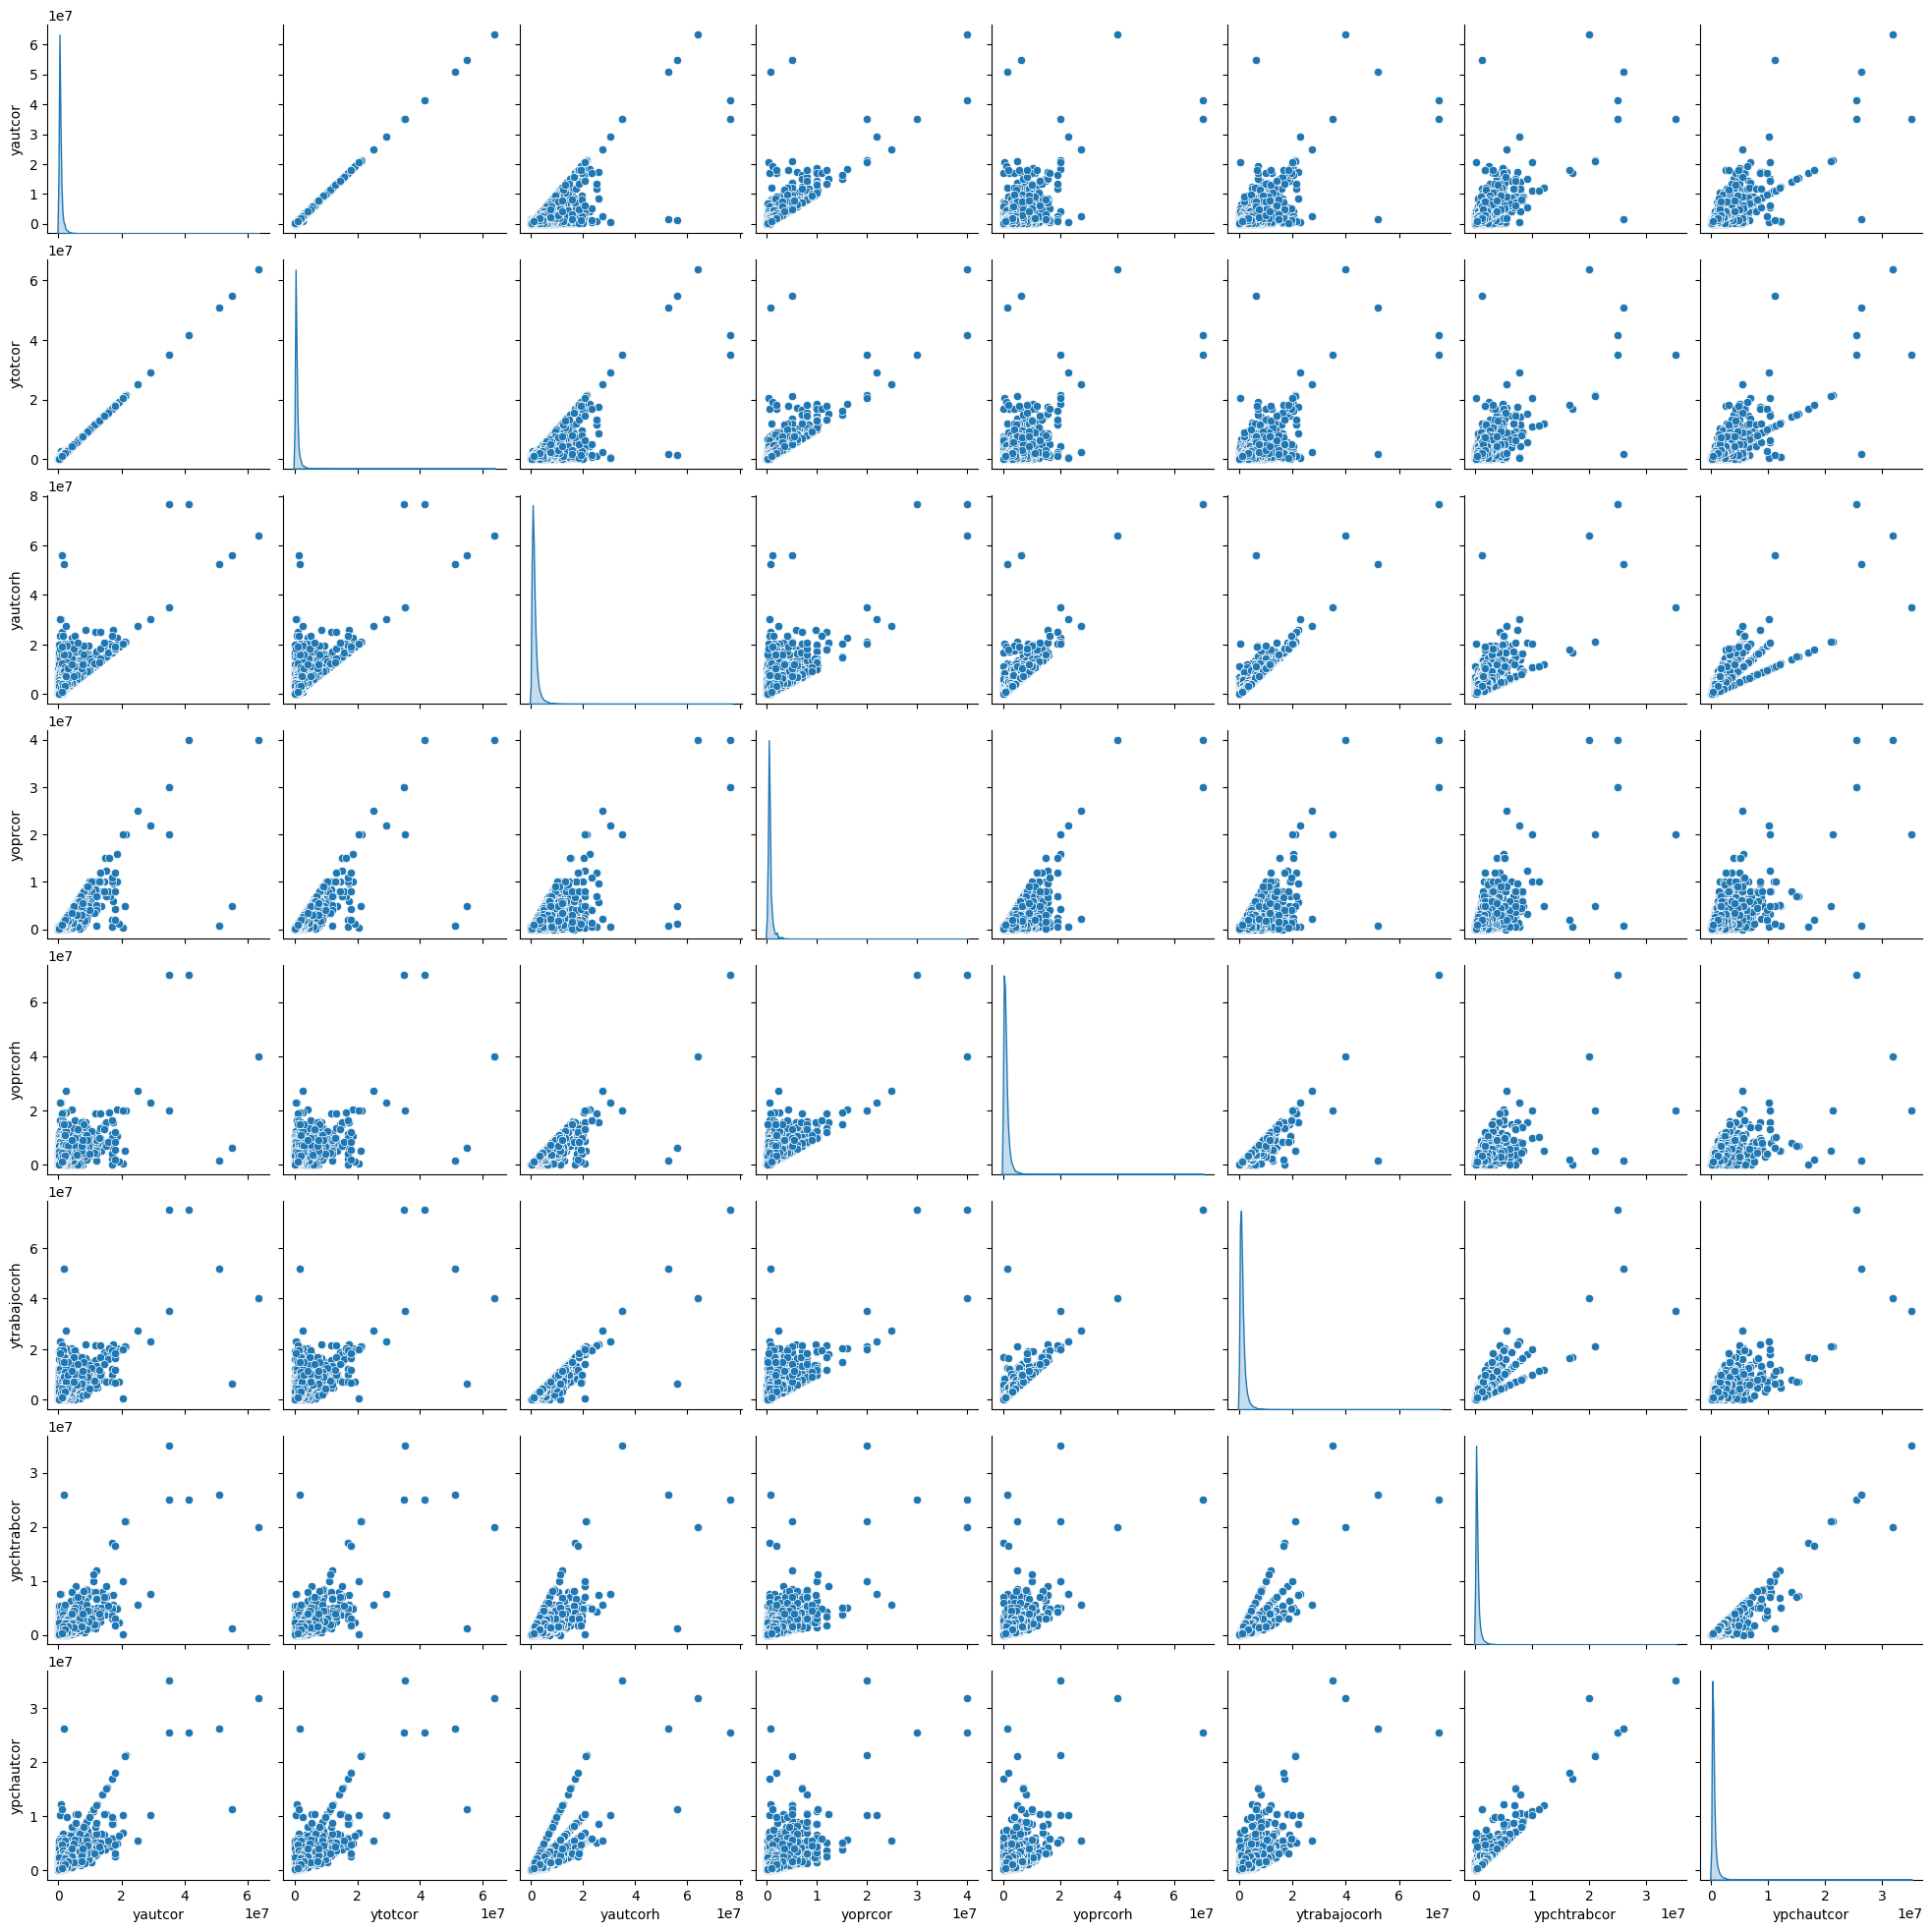

In [13]:
# 6. Realice un análisis descriptivo, mostrando al menos los gráficos de dispersión, histogramas, gráficos de torta, caja, etc.
# Análisis descriptivo de las variables seleccionadas
plt.figure(figsize=(12, 10))
sns.pairplot(data_STATA_cleaned[columnas_seleccionadas], diag_kind='kde')
plt.show()

In [14]:
# 7. Obtenga el mejor ajuste posible con al menos un R^2 igual a 0.7
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R^2: {r2:.2f}")

R^2: 0.98


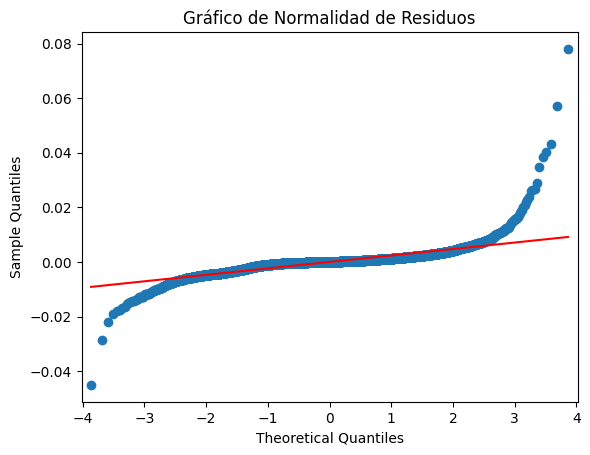

In [15]:
# 8. Compruebe que su modelo satisface las condiciones de regresión lineal múltiple (Hipótesis de Normalidad)
residuos = y_test - y_pred
sm.qqplot(residuos, line='s')
plt.title("Gráfico de Normalidad de Residuos")
plt.show()

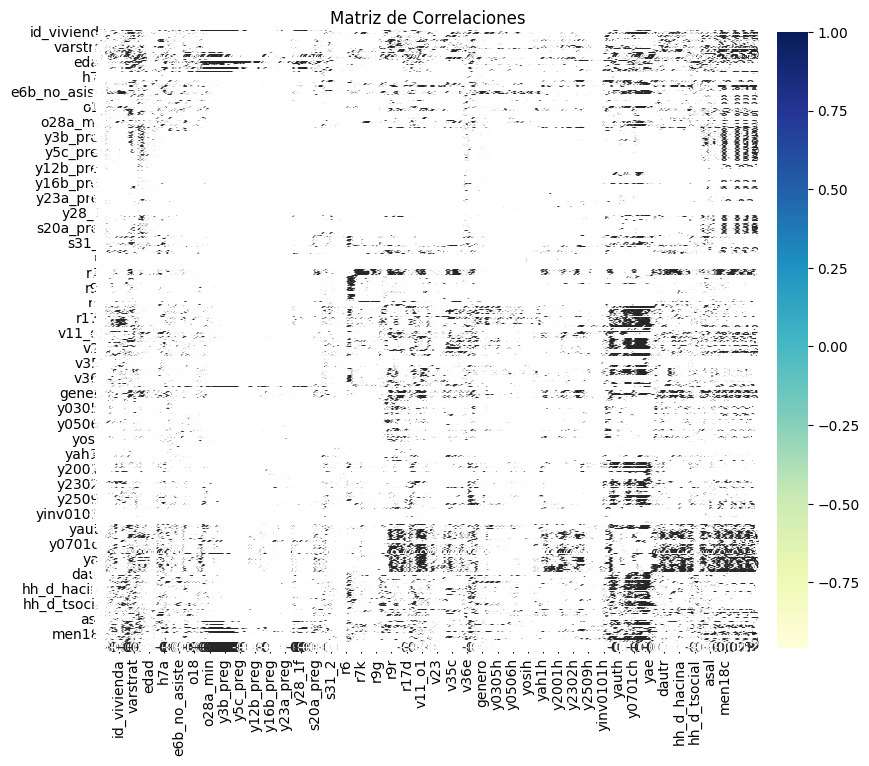

In [16]:
# 9. Calcule la matriz de correlaciones entre las variables e interprete, realice el gráfico de correlaciones entre los pares de variables
correlation_matrix = data_STATA_cleaned_normalized.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.title("Matriz de Correlaciones")
plt.show()

In [17]:
# 10. Represente el modelo de regresión lineal múltiple interpretando y explicando la importancia de cada uno de los coeficientes betas
coef = pd.Series(model.coef_, index=X.columns[rfe.get_support()])
print("Coeficientes del modelo:")
print(coef)

Coeficientes del modelo:
yautcor         1.144926
ytotcor        -0.410057
yautcorh       -0.260705
yoprcor         0.280488
yoprcorh       -0.224354
ytrabajocorh    0.501944
ypchtrabcor     0.290410
ypchautcor     -0.239274
dtype: float64


In [18]:
# 11. Calcule al menos 2 índices de error de la RLM
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Raíz del error cuadrático medio (RMSE): {rmse}")

Error cuadrático medio (MSE): 5.60181858664343e-06
Raíz del error cuadrático medio (RMSE): 0.002366816128608944


In [19]:
import numpy as np

# 12. Realice una predicción basado en su modelo
nuevos_datos_sin_normalizar = pd.DataFrame(columns=data_STATA_cleaned.columns)

print("Número de columnas en data_STATA_cleaned:", len(data_STATA_cleaned.columns))

num_columnas = len(data_STATA_cleaned.columns)
valores_aleatorios = list(np.random.random(num_columnas))

nuevos_datos_sin_normalizar.loc[0] = valores_aleatorios

nuevos_datos_normalizados = pd.DataFrame(scaler.transform(nuevos_datos_sin_normalizar), columns=nuevos_datos_sin_normalizar.columns)
nuevos_datos_prediccion = nuevos_datos_normalizados[X.columns[rfe.get_support()]]
predicciones = model.predict(nuevos_datos_prediccion)
print("Predicciones:", predicciones)

Número de columnas en data_STATA_cleaned: 450
Predicciones: [3.85812915e-05]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


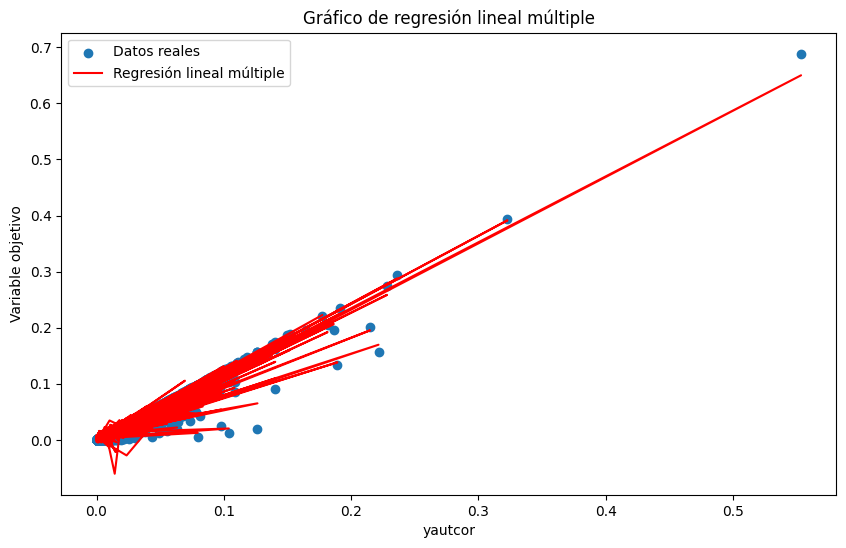

In [21]:
# 13. Realice un gráfico de la recta de RLM sobre los datos
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], y_test, label='Datos reales')
plt.plot(X_test[:, 0], y_pred, color='red', label='Regresión lineal múltiple')
plt.xlabel(X.columns[rfe.get_support()][0])  # Accede al nombre de la columna desde X.columns
plt.ylabel('Variable objetivo')
plt.title('Gráfico de regresión lineal múltiple')
plt.legend()
plt.show()

In [22]:
# 15. Discuta cómo se podría mejorar este modelo
print("Posibles mejoras del modelo:")
print("- Explorar transformaciones de variables para mejorar la linealidad")
print("- Considerar modelos no lineales (ej. regresión polinomial, árboles de decisión)")
print("- Realizar una validación cruzada para una mejor estimación del rendimiento")
print("- Ajustar los hiperparámetros del modelo (ej. regularización)")
print("- Probar técnicas de ensemble (ej. Random Forest, Gradient Boosting)")

Posibles mejoras del modelo:
- Explorar transformaciones de variables para mejorar la linealidad
- Considerar modelos no lineales (ej. regresión polinomial, árboles de decisión)
- Realizar una validación cruzada para una mejor estimación del rendimiento
- Ajustar los hiperparámetros del modelo (ej. regularización)
- Probar técnicas de ensemble (ej. Random Forest, Gradient Boosting)
